# CNN Model
By Josh Houlding

<b>Assignment Instructions Page:</b> https://halo.gcu.edu/courses/DSC-550-O500-20240711#assignment-submission/328899c3-997c-47da-b763-ad68d280d5ef

The aim behind CNN is to classify images and text within large amounts of data in order to train a neural network to identify them with as close to 100% accuracy as possible. 

In this assignment, students will build and train a convolutional neural network (CNN) to recognize an image from a set. The general idea is that you will use a large set of images to train the neural network, then you will use it to identify an image presented to it.

# Assignment Instructions
Complete the following steps, then write a comprehensive technical report as a Python Jupyter notebook (to include all code, code comments, all outputs, plots, and analysis). Make sure the project documentation contains a) problem statement, b) algorithm of the solution, c) analysis of the findings, and d) references.

1. Browse the Kaggle "Datasets," located in the topic Resources.
2. Select one dataset for your project.
3. Write a short description of the dataset and what your CNN will recognize.
4. Import the appropriate libraries: tensorflow, keras, numpy, glob, matplotlib, MaxPooling2D, and any others that would fit your model.
5. Initialize the CNN.
6. Utilize the following arguments to add a convolutional layer: Filters, Kernel_size, Padding, Activation Function – Relu, and Input shape.
7. Downsample the images by applying a pooling operation.
8. Did you choose max pooling, average pooling, or global pooling? Explain which type of pooling you used and why. What are the advantages and disadvantages of your pooling choice?
9. Repeat steps 5–7 to add 3 more convolutional layers.
10. Convert the dataset into a 1-D array for input into the next layer (flattening the dataset), which is fully linked.
11. Use the dense class to create a fully connected layer (relu activation) and output one (softmax activation).
12. Train, then appraise the CNN you just created. Compile the CNN model using compile, with three parameters:
    - Loss Function: use categorical_crossentropy
    - Optimizer: your choice (Adam, Momentum, Nesterov Accelerated Gradient, or Min-Batch Gradient Descent).
    - Metrics Arguments: Accuracy to evaluate performance. Fit the model on the training set with at least 85 iterations (epochs). Evaluate the result. Compare the accuracy and loss function for both the training and test dataset. Plot the loss graph. Plot the accuracy graph.
13. Discuss how the CNN model is utilized in recognizing the images from the dataset and which optimizer provides for the performance model (highest accuracy and how many times to get to that level) the overall performance of your model. Justify your choice of optimizer by comparing it to two other optimizers.

# Tasks 1-3
<b>1:</b> <i>Browse the Kaggle "Datasets," located in the topic Resources.</i> <br>
<b>2:</b> <i>Select one dataset for your project.</i> <br>
<b>3:</b> <i>Write a short description of the dataset and what your CNN will recognize.</i>

<b>Selected Dataset:</b> [Gender Recognizer | Kaggle](https://www.kaggle.com/datasets/humairmunir/gender-recognizer)

This dataset contains 646 photos of men and 646 photos of women, and is intended for use in a CNN-powered gender classification model. This is the description on the Kaggle page: 

> Gender Recognition: Male and Female Images

> This comprehensive dataset is designed for gender recognition tasks and consists of a wide variety of male and female images collected from public resources. It includes:

> Diverse Age Groups: Images of individuals from various age groups to ensure a broad representation.
Different Ethnicities: A mix of ethnic backgrounds to support the development of inclusive and generalizable models.
Variety of Environments: Photos taken in diverse settings, including indoor and outdoor locations, to add realism and variability.
Multiple Angles and Expressions: Images capturing different facial angles and expressions to challenge and enhance model robustness.
This dataset is ideal for training and evaluating machine learning models aimed at gender classification. Each image is labeled as either 'Male' or 'Female' to facilitate supervised learning tasks.

> *Usage:
Gender Recognition: Develop models to classify gender based on facial features.
Transfer Learning: Fine-tune pre-trained models on this dataset for gender recognition.
Research and Development: Use the dataset for academic and commercial research to explore gender classification techniques and improve algorithm performance.
Data Collection:
The images in this dataset were gathered from publicly available resources, ensuring a rich and diverse set of examples for robust model training and evaluation. Proper permissions and usage rights were considered in the compilation of this dataset.

Once trained on this dataset, my CNN will take an image of a person's face and classify them as either male or female.

# Task 4
<i>Import the appropriate libraries: tensorflow, keras, numpy, glob, matplotlib, MaxPooling2D, and any others that would fit your model.</i>

In [1]:
# Import core CNN libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import additional useful libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Tasks 5-7
<b>5: </b><i>Initialize the CNN.</i> <br>
<b>6: </b><i>Utilize the following arguments to add a convolutional layer: Filters, Kernel_size, Padding, Activation Function – Relu, and Input shape.</i> <br>
<b>7: </b><i>Downsample the images by applying a pooling operation.</i>

In [2]:
# Initialize CNN
model = Sequential()

# Add input layer
model.add(Input(shape=(64, 64, 3)))

# Add 1st convolutional layer w/max pooling
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Task 8
<i>Did you choose max pooling, average pooling, or global pooling? Explain which type of pooling you used and why. What are the advantages and disadvantages of your pooling choice?</i>

I chose max pooling for my model because it takes the feature with the maximum importance from each region of the input feature map. This enables the model to focus on the most crucial parts of the image for predicting a person's gender based on their photo.

Average pooling is sub-optimal because it would dilute strong features with weaker ones, and global pooling, which boils the entire input feature map down to a single value, is too strong and may cause important spacial information to be lost.

# Task 9
<i>Repeat steps 5–7 to add 3 more convolutional layers.</i>

In [3]:
# Add 2nd convolutional layer w/max pooling
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add 3rd convolutional layer w/max pooling
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add 4th convolutional layer w/max pooling
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Task 10
<i>Convert the dataset into a 1-D array for input into the next layer (flattening the dataset), which is fully linked.</i>

In [4]:
# Flatten layers
model.add(Flatten())

# Task 11
<i>Use the dense class to create a fully connected layer (relu activation) and output one (softmax activation).</i>

In [5]:
# Add fully connected layer
model.add(Dense(units=128, activation="relu"))

# Add dropout layer to avoid overfitting
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(units=2, activation="softmax"))

# Task 12
<i>Train, then appraise the CNN you just created. Compile the CNN model using compile, with three parameters:</i>
* <i>Loss Function: use categorical_crossentropy.</i>
* <i>Optimizer: your choice (Adam, Momentum, Nesterov Accelerated Gradient, or Min-Batch Gradient Descent).</i>
* <i>Metrics Arguments: Accuracy to evaluate performance. Fit the model on the training set with at least 85 iterations (epochs). Evaluate the result. Compare the accuracy and loss function for both the training and test dataset. Plot the loss graph. Plot the accuracy graph.</i>

### Loading the data

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define path to dataset
dataset_dir = "GenderRecognizerData"

# Initialize ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical", 
    subset="training"
)

# Load testing data
test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Show class indices to ensure labels are correct
print(train_generator.class_indices)

Found 1033 images belonging to 2 classes.
Found 258 images belonging to 2 classes.
{'Men': 0, 'Women': 1}


### Compiling the model

In [7]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

To avoid running the model for more epochs than necessary, we will implement early stopping so the training process will halt if an additional epoch yields negligible improvements to accuracy. We will also set the model up to reduce the learning rate when this happens, since this will lead to a final solution more quickly due to smaller weight adjustments per epoch.

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Implement early stopping and learning rate reducer mechanisms
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.001)

### Training the model
We will plan to run the model for 100 epochs initially, stopping if subsequent epochs yield negligible improvements to accuracy or loss.

In [9]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

# Train the model
history = model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 663ms/step - accuracy: 0.5002 - loss: 0.7096 - val_accuracy: 0.5000 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 407ms/step - accuracy: 0.5597 - loss: 0.6819 - val_accuracy: 0.6124 - val_loss: 0.6512 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 398ms/step - accuracy: 0.6517 - loss: 0.6399 - val_accuracy: 0.6628 - val_loss: 0.6503 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 401ms/step - accuracy: 0.6981 - loss: 0.5894 - val_accuracy: 0.6240 - val_loss: 0.6459 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 388ms/step - accuracy: 0.6871 - loss: 0.5729 - val_accuracy: 0.7171 - val_loss: 0.5747 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 404ms/step - accuracy: 0.7438 - loss: 0.5184 - val_accuracy: 0.7519 - val_loss: 0.5470 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 387ms/step - accuracy: 0.8014 - l

The model is done training, so it is time for evaluation. We will compare the accuracy and loss of the model on both the train and test datasets.

### Evaluating the model

In [15]:
# Find the model's accuracy and loss for the training set
train_loss, train_accuracy = model.evaluate(train_generator)

# Find the model's accuracy and loss for the test set
test_loss, test_accuracy = model.evaluate(test_generator)

33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 348ms/step - accuracy: 0.9090 - loss: 0.2516
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 339ms/step - accuracy: 0.7452 - loss: 0.5415


In [18]:
# Display evaluation results
print(f"Training accuracy: {train_accuracy:.4f} \n Training loss: {train_loss:.4f}")
print(f"Testing accuracy: {test_accuracy:.4f} \n Testing loss: {test_loss:.4f}")

Training accuracy: 0.9080 
 Training loss: 0.2468
Testing accuracy: 0.7442 
 Testing loss: 0.5409


We see from the results that the model is highly accurate on the training set, with minimal loss, but accuracy drops off sharply during testing, and loss increases. This indicates possible overfitting problems that we will explore in more detail after graphing accuracy and loss for both the training and testing sets.

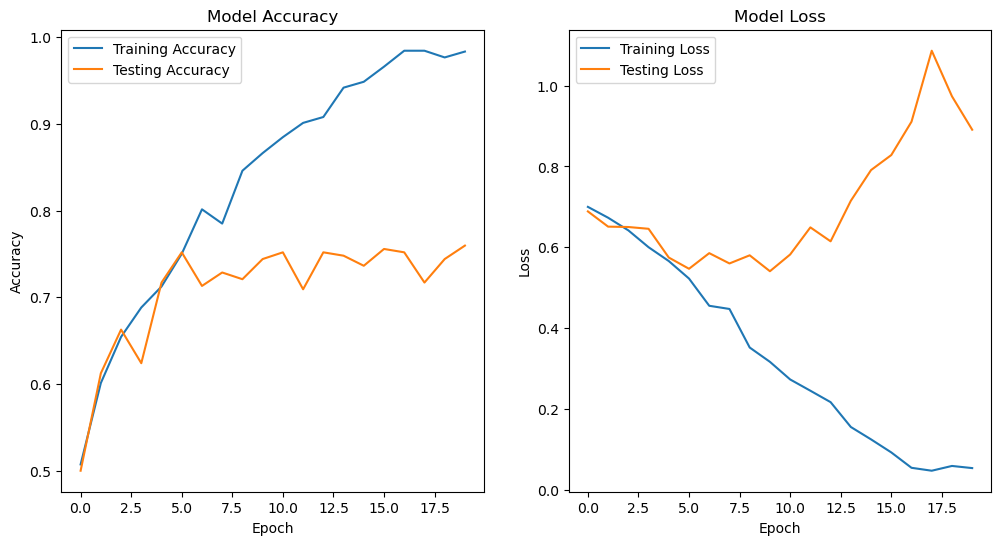

In [17]:
# Plot training and testing accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Testing Accuracy"])

# Plot training and testing loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Testing Loss"])

plt.show()

<b>Accuracy graph: </b> We see that model accuracy steadily increases until it reaches about 0.97, then mostly levels off with slight fluctuations, while the testing accuracy levels off much sooner at about 0.73. This discrepancy could be the result of the model overfitting to the training data and struggling to retain accuracy with new unseen data.

<b>Loss graph: </b>During training, the model's loss steadily decreases, while it greatly surges during testing. This also indicates potential overfitting problems, as it's possible that the model gets better at fitting to the training set over the training process, and this hampers its ability to fit to the validation set. 

It is strange that overfitting is a likely issue with the model, since we did include a dropout layer, which is supposed to avoid this exact problem by disabling a subset of neurons during each training batch. Other remedies could include creating more training data by applying random transformations (rotations, shifts, etc.) to images, adding an L1 or L2 regularizer, or implementing batch normalization.

# Task 13
<i>Discuss how the CNN model is utilized in recognizing the images from the dataset and which optimizer provides for the performance model (highest accuracy and how many times to get to that level) the overall performance of your model. Justify your choice of optimizer by comparing it to two other optimizers.</i>

The CNN recognizes and classifies the images using the following procedure: 

1. Images are passed into the model through the input layer.
2. The convolutional layers create feature maps from the images using filters. 
3. The activation functions of the convolutional layers (eg. ReLU) enable learning of more complex patterns via introducing nonlinearity.
4. The feature maps are downsampled by pooling layers to reduce their complexity while retaining important features.
5. A flattening layer transforms the 2D feature maps into a 1D array. 
6. The fully connected layer takes the 1D feature map array and performs classification. 
7. The output layer generates the final classification prediction or class probabilities.

The Adam (Adaptive Moment Estimation) optimizer is a popular choice for deep learning models for several reasons. First, it provides adaptive learning rates for individual parameters, which enables the model to converge to a final prediction quickly. Second, it combines the benefits of two other optimizers, AdaGrad (provides adaptive learning rates) and RMSProp (effective with noisy data), making it an excellent optimizer for a wide variety of applications. Finally, Adam includes bias correction and momentum, which further enhance its performance. 

Adam is preferable to Stochastic Gradient Descent (SGD) because SGD struggles with noisy data, and it is also better than Root Mean Square Propagation (RMSProp), since Adam does not need extensive hyperparameter tuning due to its adaptive features.

# References
Gender recognizer. (2024, July 7). Kaggle. https://www.kaggle.com/datasets/humairmunir/gender-recognizer <br>
Analytics Vidhya. (2024, July 22). Image classification using CNN. https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/ <br>
Microsoft. (2024). Copilot [Large language model]. https://www.bing.com/?FORM=Z9FD1 <br>
OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com/